In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import numpy as np
import matplotlib
import matplotlib.font_manager
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
matplotlib.font_manager._rebuild()

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

plt.rcParams['figure.figsize'] = (20, 8)   
plt.rcParams['figure.dpi'] = 72             
plt.rcParams['font.size'] = 20              
plt.rcParams['text.usetex'] = False 
# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['SimHei','Arial']})
# matplotlib.rcParams['font.sans-serif'] = ['SimHei','Arial']


color_palette = sns.color_palette(n_colors = 3)

PROJECTION_COL,DEATH_COL, INFECTION_COL   = color_palette

In [31]:
raw[1]

DateCST     Cases           Deaths Recovered  Quarantine           \
       DateCST Suspected Confirmed Deaths Recovered Quarantined Released   
0   2019.12.31      27.0       NaN    NaN       NaN         NaN      NaN   
1   2020.01.03      44.0       NaN    NaN       NaN       121.0      NaN   
2   2020.01.05      59.0       NaN    NaN       NaN       163.0      NaN   
3   2020.01.10       NaN      41.0    1.0       NaN         NaN      NaN   
4   2020.01.11       NaN      41.0    1.0       NaN       717.0     46.0   
5   2020.01.12       NaN      41.0    1.0       NaN       687.0     76.0   
6   2020.01.13       NaN      41.0    1.0       NaN       576.0    187.0   
7   2020.01.15       NaN       NaN    2.0       7.0       119.0    644.0   
8   2020.01.16       NaN      45.0    NaN      12.0        98.0    665.0   
9   2020.01.17       NaN      62.0    2.0      15.0        82.0    681.0   
10  2020.01.18       NaN     121.0    NaN      19.0         NaN      NaN   
11  2020.01.19       NaN     198.0    3.0      25.0        90.0    727.0   
12  2020.01.20      54.0     291.0    6.0      25.0       922.0    817.0   
13  2020.01.21      37.0     440.0    9.0       NaN      1394.0    765.0   
14  2020.01.22     257.0     571.0   17.0       NaN      4928.0    969.0   
15  2020.01.23    1072.0     830.0   25.0       NaN      8420.0   1087.0   
16  2020.01.24    1965.0    1287.0   41.0      38.0     13967.0   1230.0   

               Source  
      Total    Source  
0       NaN       [4]  
1       NaN       [5]  
2       NaN       [6]  
3       NaN       [7]  
4     763.0       [8]  
5     763.0       [9]  
6     763.0      [10]  
7     763.0      [11]  
8     763.0      [12]  
9     763.0      [13]  
10      NaN       NaN  
11    817.0      [14]  
12   1739.0  [15][16]  
13   2159.0      [17]  
14   5897.0      [18]  
15   9507.0      [19]  
16  15197.0      [20]

In [41]:
raw = pd.read_html('https://en.wikipedia.org/wiki/Timeline_of_the_2019%E2%80%9320_Wuhan_coronavirus_outbreak')

df = raw[1]

df = df[[('DateCST','DateCST'),('Cases', 'Confirmed'), ('Deaths', 'Deaths'), ('Recovered', 'Recovered')]]
df.columns = ['date', 'infections', 'deaths', 'recovered']

df.date = pd.to_datetime(df.date)
df = df.dropna(thresh=3)

df.infections = df.infections.where(df.infections.notnull(), df.infections.shift(1))
df.deaths = df.deaths.where(df.deaths.notnull(), df.deaths.shift(1))
for i in range(3):
    df.recovered = df.recovered.where(df.recovered.notnull(), df.recovered.shift(1))
df.recovered = df.recovered.where(df.recovered.notnull(), 0)
df_all = df.copy()

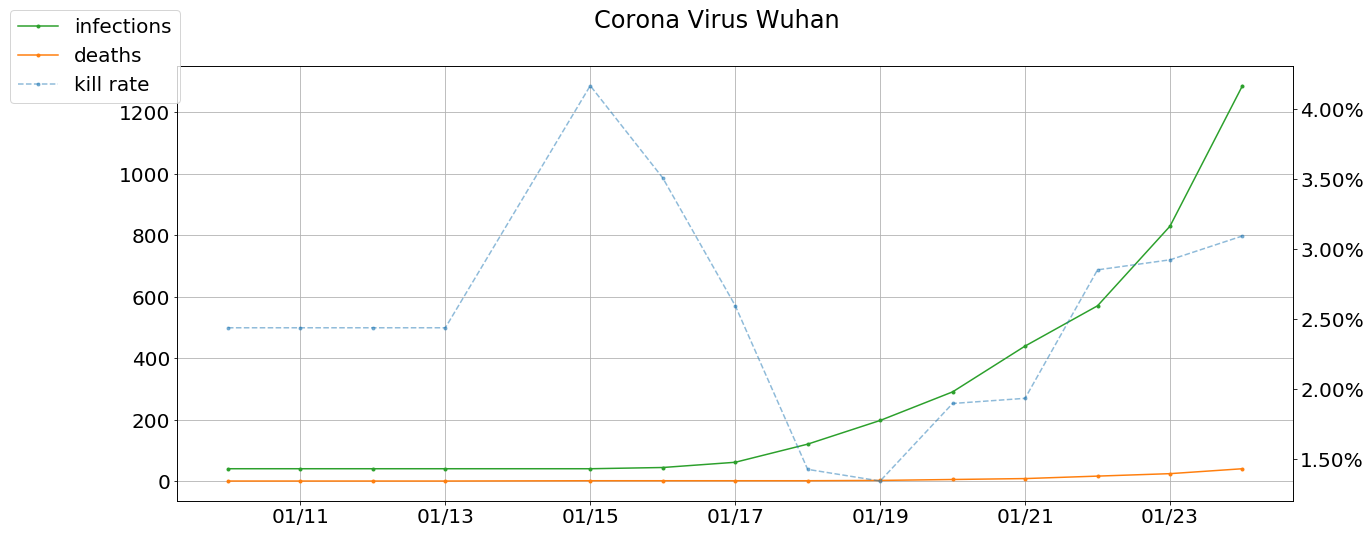

In [42]:
fig, ax = plt.subplots(1,1)
ax2 = ax.twinx()
ax2.plot(df_all.date, 100*df_all.deaths/ (df_all.infections+df_all.recovered), '--', alpha = 0.5, marker = '.', label = 'kill rate')
ax.plot(df_all.date, df_all.infections, marker='.', color=INFECTION_COL, label='infections')
ax.plot(df_all.date, df_all.deaths, marker='.', color=DEATH_COL, label='deaths')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

fig.suptitle('Corona Virus Wuhan')
fig.legend(loc= 2)
ax.grid()